In [251]:
import networkx as nx
import json
import matplotlib.pyplot as plt
from operator import itemgetter
import pandas

In [252]:
def draw(G) :
    return nx.draw_networkx(G,
                 pos=nx.spring_layout(G),
                 alpha = 0.6, # transparence
                 node_size = [G.degree(node)*15 for node in G.nodes()],
                )

### Load data

In [330]:
nodepath = 'darksouls3/DS3_nodes.json'
edgepath = 'darksouls3/DS3_dir_edges.json'

In [331]:
with open(nodepath, mode = 'r', encoding='utf-8') as f:
    nodes = json.load(f)

In [332]:
with open(edgepath, mode = 'r', encoding='utf-8') as g :
    edges = json.load(g)

### Create Directed Graph

In [333]:
Gd = nx.DiGraph()

In [334]:
nodes_clean = []
for node in nodes:
    newnode = (node['id'], node)
    nodes_clean.append(newnode)
len(nodes_clean)

58

In [335]:
edges_clean = []
for edge in edges:
    for dest in edge['dest']:
        newedge = (edge['origin'], dest)
        edges_clean.append(newedge)
len(edges_clean)

132

In [336]:
Gd.add_nodes_from(nodes_clean)

In [337]:
Gd.add_edges_from(edges_clean)

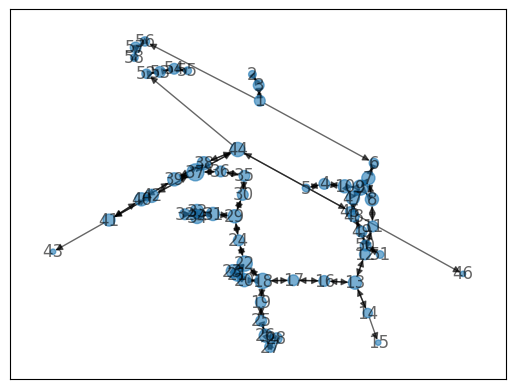

In [338]:
draw(Gd)

### Compute measures

In [339]:
G2 = nx.Graph(Gd)

In [340]:
nx.is_connected(G2)

True

In [341]:
Gcc = sorted(nx.connected_components(G2), key=len, reverse=True)
G = G2.subgraph(Gcc[0])

In [342]:
#nombre de noeuds
print(len(G.nodes()))

#nombre d'arêtes
print(len(G.edges()))

#diamètre
print(nx.diameter(G))

# Excentricité moyenne
values = []
for value in nx.eccentricity(G).values():
    values.append(value)   
mean_distance = sum(values)/len(values)
print(round(mean_distance,3))

#densité
print(round(nx.density(G),3))

#fermeture triadique
print(round(nx.transitivity(G),3))

# moy. chemin le plus court
print(round(nx.average_shortest_path_length(G),3))

#taille max. des cliques et cliques maximales
maxc = max([len(i) for i in list(nx.find_cliques(G))])
print(maxc)
for c in nx.find_cliques(G):
    if len(c) == maxc:
        print(c)

58
69
24
18.552
0.042
0.256
9.65
3
[7, 8, 9]
[9, 10, 47]
[20, 21, 23]
[21, 22, 23]
[26, 27, 28]
[31, 33, 34]
[32, 33, 34]
[37, 38, 44]
[37, 38, 39]
[40, 41, 42]


In [343]:
#degré des noeuds
for id, nb in sorted(dict(nx.degree(G)).items(), key=itemgetter(1), reverse=True)[:5]:
    name = G.nodes(data=True)[id]['name']
    print(f'{name}, {nb}')

Church of Yorshka, 5
Dancer of the Boreal Valley, 4
Crucifixion Woods, 4
Farron Keep Perimeter, 4
Irithyll Dungeon, 4


In [344]:
#centralité de proximité
for id, nb in sorted(nx.closeness_centrality(G).items(), key=itemgetter(1), reverse=True)[:5]:
    name = G.nodes(data=True)[id]['name']
    print(f'{name}, {round(nb, 3)}')

Crucifixion Woods, 0.15
Farron Keep Perimeter, 0.148
Halfway Fortress, 0.147
Road of Sacrifices, 0.143
Abyss Watchers, 0.143


In [345]:
#centralité intermédiaire
for id, nb in sorted(nx.betweenness_centrality(G).items(), key=itemgetter(1), reverse=True)[:5]:
    name = G.nodes(data=True)[id]['name']
    print(f'{name}, {round(nb, 3)}')

Crucifixion Woods, 0.591
Catacombs of Carthus, 0.516
Farron Keep Perimeter, 0.509
Cliff Underside, 0.508
Halfway Fortress, 0.496


In [346]:
from tqdm import tqdm

fullnodes = []
ids = []
for el in tqdm(nodes_clean):
    entry = {
        'name': el[1]['name'],
        'zone': el[1]['zone'],
        'degree': nx.degree(G2)[el[0]],
        'closeness centrality' : round(nx.closeness_centrality(G2)[el[0]],3),
        'betweenness centrality' : round(nx.betweenness_centrality(G2)[el[0]],3),
    }

    fullnodes.append(entry)
    ids.append(el[0])

df = pandas.DataFrame(fullnodes, index=ids)    

100%|█████████████████████████████████████████████████████████████████████████████████| 58/58 [00:00<00:00, 118.87it/s]


In [347]:
df

,name,zone,degree,closeness centrality,betweenness centrality
1,Firelink Shrine,Cemetery of Ash,3,0.096,0.167
2,Cemetery of Ash,Cemetery of Ash,1,0.081,0.000
3,Iudex Gundyr,Cemetery of Ash,2,0.088,0.035
4,Untended Graves,Untended Graves,2,0.095,0.035
5,Champion Gundyr,Untended Graves,1,0.086,0.000
6,High Wall of Lothric,High Wall of Lothric,2,0.104,0.192
7,Tower on the Wall,High Wall of Lothric,3,0.113,0.219
8,Vordt of the Boreal Valley,High Wall of Lothric,3,0.121,0.426
9,Dancer of the Boreal Valley,High Wall of Lothric,4,0.114,0.246
10,"Oceiros, the Consumed King",High Wall of Lothric,3,0.104,0.069
